In [1]:
!pip install torch
!pip install pytorch_transformers
!pip install pymysql
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 13.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.9 MB/s eta 0:00:00:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=42317670cbe2ac2ab2f3c00e7b777dcedb6092388ba12520677addf0c6778bd4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
  Attempting uninstall

In [2]:
!python -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [4]:
!python -m pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [1]:
import torch
from torch import nn
import pandas as pd
import calendar
import json
import joblib
from pandas import DataFrame
from sqlalchemy import create_engine
from sklearn.preprocessing import OneHotEncoder
from pytorch_transformers import BertModel, BertConfig, BertTokenizer
import numpy as np
import os
import datetime
from numpy import float32

In [115]:
xitu_data = pd.read_excel('xitu_keywords_report.xlsx',index_col=0)
xitu_data

,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,click_percent,...,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,date_time,account_id,create_time,campaign_type
id,,,,,,,,,,,,,,,,,,,,,
443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,0.0098,...,0.0000,0,0,0,0.0,0,2022-07-02,22,2022-07-04 11:35:47,1
443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,0.0060,...,0.0000,0,0,0,0.0,0,2022-07-02,22,2022-07-04 11:35:47,1
443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,0.0049,...,0.0000,0,0,0,0.0,0,2022-06-30,22,2022-07-04 11:35:47,1
443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,0.0057,...,0.0000,0,0,0,0.0,0,2022-07-03,22,2022-07-04 11:35:47,1
443685,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,253,2,0.0079,...,0.0000,0,0,0,0.0,0,2022-06-30,22,2022-07-04 11:35:47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340944,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,235585786033166,dual band usb wifi adapter,3,52,1,0.0192,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:51,1
1340954,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,252298897601949,ac1300 usb wifi adapter,3,5,1,0.2000,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:51,1
1340955,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,174832515079630,external usb wifi adapter,1,4,1,0.2500,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:51,1


In [2]:
xitu_csv = pd.read_csv('xitu_keywords_report.csv')
xitu_csv

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,date_time,account_id,create_time,campaign_type
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.0000,0,0,0,0.0,0,2022-07-02,22,2022/7/4 11:35:47,1
1,443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,...,0.0000,0,0,0,0.0,0,2022-07-02,22,2022/7/4 11:35:47,1
2,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,0.0000,0,0,0,0.0,0,2022-06-30,22,2022/7/4 11:35:47,1
3,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,0.0000,0,0,0,0.0,0,2022-07-03,22,2022/7/4 11:35:47,1
4,443685,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,253,2,...,0.0000,0,0,0,0.0,0,2022-06-30,22,2022/7/4 11:35:47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,1340944,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,235585786033166,dual band usb wifi adapter,3,52,1,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022/7/4 18:19:51,1
13770,1340954,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,252298897601949,ac1300 usb wifi adapter,3,5,1,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022/7/4 18:19:51,1
13771,1340955,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,174832515079630,external usb wifi adapter,1,4,1,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022/7/4 18:19:51,1
13772,1340958,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,98,2,...,0.1432,0,1,0,0.5,0,2022-06-11,6,2022/7/4 18:19:52,1


In [3]:
xitu_csv.head(2)

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,date_time,account_id,create_time,campaign_type
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.0,0,0,0,0.0,0,2022-07-02,22,2022/7/4 11:35:47,1
1,443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,...,0.0,0,0,0,0.0,0,2022-07-02,22,2022/7/4 11:35:47,1


In [188]:
xitu_data.head(4)

,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,click_percent,...,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,date_time,account_id,create_time,campaign_type
id,,,,,,,,,,,,,,,,,,,,,
443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,0.0098,...,0.0,0,0,0,0.0,0,2022-07-02,22,2022-07-04 11:35:47,1
443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,0.0060,...,0.0,0,0,0,0.0,0,2022-07-02,22,2022-07-04 11:35:47,1
443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,0.0049,...,0.0,0,0,0,0.0,0,2022-06-30,22,2022-07-04 11:35:47,1
443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,0.0057,...,0.0,0,0,0,0.0,0,2022-07-03,22,2022-07-04 11:35:47,1


In [193]:
xitu_csv.tail(2)

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,fees_percent,total_order,change_rate,date_time,create_time,weekday,weekend,month,quater,holiday_type
13772,1340958,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,98,2,...,0.1432,1,0.5,2022-06-11,2022-07-04 18:19:52,5,weekday,6,2,normal
13773,1340972,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,101,2,...,0.0000,0,0.0,2022-06-10,2022-07-04 18:19:53,4,weekday,6,2,normal


In [12]:
xitu_data.tail(4)

,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,click_percent,...,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,date_time,account_id,create_time,campaign_type
id,,,,,,,,,,,,,,,,,,,,,
1340954,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,252298897601949,ac1300 usb wifi adapter,3,5,1,0.2000,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:51,1
1340955,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,174832515079630,external usb wifi adapter,1,4,1,0.2500,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:51,1
1340958,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,98,2,0.0204,...,0.1432,0,1,0,0.5,0,2022-06-11,6,2022-07-04 18:19:52,1
1340972,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,101,2,0.0198,...,0.0000,0,0,0,0.0,0,2022-06-10,6,2022-07-04 18:19:53,1


In [35]:
xitu_data.dtypes

campaign_name             object
campaign_id                int64
adv_group_name            object
adv_group_id               int64
keyword_id                 int64
keyword_text              object
match_type                 int64
impressions                int64
clicks                     int64
click_percent            float64
cpc_fee                  float64
fees                     float64
sales_fees               float64
fees_percent             float64
roas                       int64
total_order                int64
total_sales                int64
change_rate              float64
sku_sales                  int64
date_time                 object
account_id                 int64
create_time       datetime64[ns]
campaign_type              int64
dtype: object

In [198]:
xitu_csv.dtypes

id                  int64
campaign_name      object
campaign_id         int64
adv_group_name     object
adv_group_id        int64
keyword_id          int64
keyword_text       object
match_type          int64
impressions         int64
clicks              int64
click_percent     float64
cpc_fee           float64
fees              float64
sales_fees        float64
fees_percent      float64
roas                int64
total_order         int64
total_sales         int64
change_rate       float64
sku_sales           int64
date_time          object
account_id          int64
create_time        object
campaign_type       int64
dtype: object

In [41]:
xitu_csv.describe()

,id,campaign_id,adv_group_id,keyword_id,match_type,impressions,clicks,click_percent,cpc_fee,fees,sales_fees,fees_percent,roas,total_order,total_sales,change_rate,sku_sales,account_id,campaign_type
count,1.377400e+04,1.377400e+04,1.377400e+04,1.377400e+04,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.0,13774.000000,13774.0,13774.000000,13774.0,13774.000000,13774.0
mean,8.209276e+05,1.277596e+14,1.447906e+14,1.405878e+14,1.955568,1294.613765,4.985262,0.019235,1.016764,4.291116,11.016626,0.047705,0.0,0.355888,0.0,0.079637,0.0,15.889139,1.0
std,3.175416e+05,8.323555e+13,8.028776e+13,8.073574e+13,0.930021,2684.753848,9.937911,0.064143,0.517731,6.204012,34.799478,0.141680,0.0,0.952416,0.0,0.253087,0.0,6.182019,0.0
min,4.436580e+05,1.763009e+12,2.576448e+11,1.310525e+11,1.000000,1.000000,1.000000,0.000100,0.030000,0.030000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.000000,1.0
25%,5.272762e+05,6.042632e+13,7.966153e+13,6.738761e+13,1.000000,136.000000,1.000000,0.002800,0.600000,1.120000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,8.000000,1.0
50%,7.079435e+05,1.140753e+14,1.505553e+14,1.422852e+14,2.000000,477.000000,2.000000,0.005800,0.910000,2.080000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,18.000000,1.0
75%,1.182592e+06,2.031561e+14,2.120520e+14,2.077184e+14,3.000000,1357.000000,5.000000,0.013500,1.380000,5.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,21.000000,1.0
max,1.340972e+06,2.811202e+14,2.802278e+14,2.808510e+14,3.000000,58740.000000,168.000000,1.000000,4.480000,84.130000,639.920000,2.752900,0.0,18.000000,0.0,9.000000,0.0,22.000000,1.0


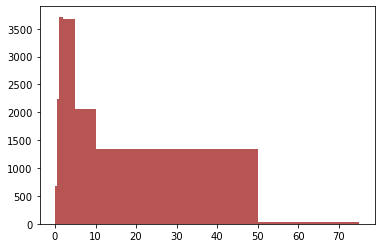

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4)) #新建画布
plt.hist(xitu_csv['fees'],bins = [0, 0.5,1,2, 5, 10, 50,75],color='brown', alpha = 0.8, label = "直方图" ) #绘制直方图

plt.show()

In [15]:
df = xitu_csv
df[df['cpc_fee']>=0.5].shape[0]/df.shape[0]

0.8454334252940322

In [16]:
df_fee =df[df['cpc_fee']>=0.5]
df_fee.corr()

,impressions,clicks,click_percent,cpc_fee,fees,sales_fees,fees_percent,total_order,change_rate
impressions,1.000000,0.632489,-0.117808,0.008862,0.675102,0.331168,0.300761,0.314048,-0.020283
clicks,0.632489,1.000000,-0.064054,-0.130613,0.891888,0.520829,0.378691,0.483632,-0.013992
click_percent,-0.117808,-0.064054,1.000000,0.021832,-0.091296,-0.021872,-0.036331,-0.014932,0.071982
cpc_fee,0.008862,-0.130613,0.021832,1.000000,0.144867,0.002996,0.025980,-0.046998,0.031869
fees,0.675102,0.891888,-0.091296,0.144867,1.000000,0.498446,0.474392,0.477438,-0.006484
sales_fees,0.331168,0.520829,-0.021872,0.002996,0.498446,1.000000,0.253370,0.732763,0.414877
fees_percent,0.300761,0.378691,-0.036331,0.025980,0.474392,0.253370,1.000000,0.436037,0.156112
total_order,0.314048,0.483632,-0.014932,-0.046998,0.477438,0.732763,0.436037,1.000000,0.525441
change_rate,-0.020283,-0.013992,0.071982,0.031869,-0.006484,0.414877,0.156112,0.525441,1.000000


<AxesSubplot:>

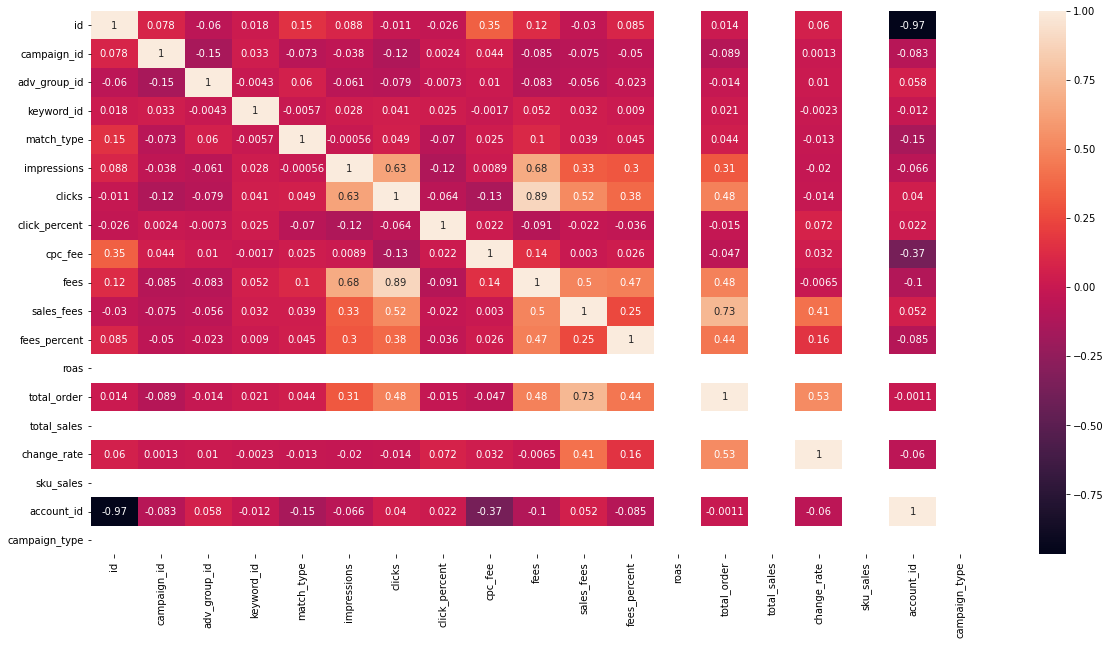

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_fee.corr(),annot=True)

In [ ]:
!pip install heatmapz

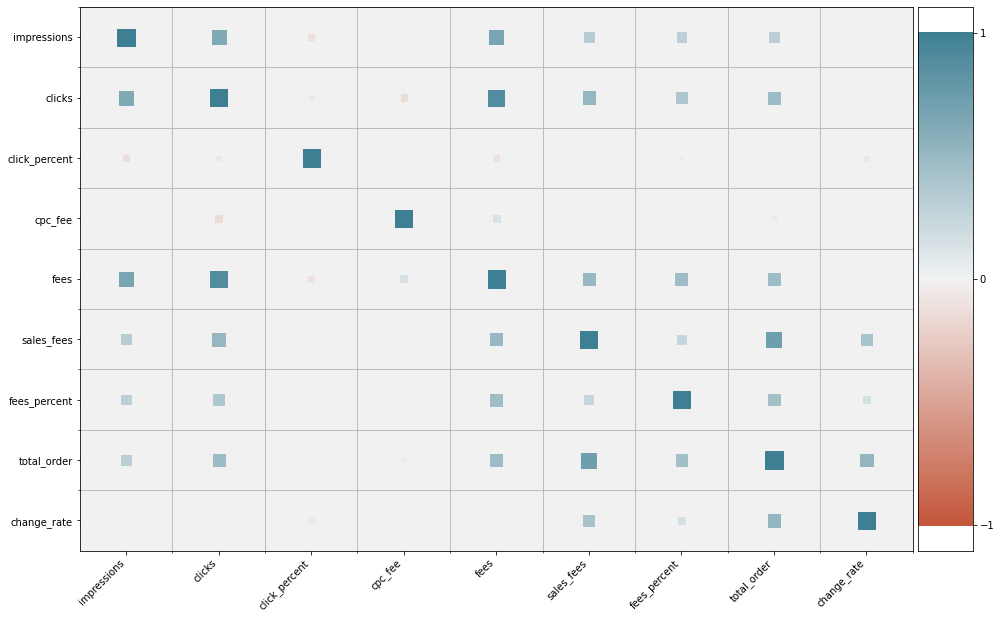

In [17]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(16, 10))
corrplot(df_fee.corr(), size_scale=300)

## feature process 

In [4]:
raw_data=xitu_csv
raw_data.columns.tolist()

['id',
 'campaign_name',
 'campaign_id',
 'adv_group_name',
 'adv_group_id',
 'keyword_id',
 'keyword_text',
 'match_type',
 'impressions',
 'clicks',
 'click_percent',
 'cpc_fee',
 'fees',
 'sales_fees',
 'fees_percent',
 'roas',
 'total_order',
 'total_sales',
 'change_rate',
 'sku_sales',
 'date_time',
 'account_id',
 'create_time',
 'campaign_type']

In [5]:
# drop the useless column
features = ['total_sales',"sku_sales","roas","campaign_type","account_id"]
#过滤无效特征
for feature in  features:
    raw_data.drop(feature, axis=1, inplace=True)


In [6]:
len(raw_data.columns.tolist())

19

In [7]:
def convert_types(df):
    df["id"] = df["id"].astype("object")
    df["keyword_id"] = df["keyword_id"].astype("object")
    df["campaign_id"] = df["campaign_id"].astype("object")
    df["adv_group_id"] = df["adv_group_id"].astype("object")
    df["match_type"] = df["match_type"].astype("category")
    return df
    
def format_db_dataframe(df):
    df["date_time"] = pd.to_datetime(df['date_time'])
    #df["report_date"] = pd.to_datetime(df['report_date'])
    df["create_time"] = pd.to_datetime(df['create_time'])
#     df.drop(columns=['id',"adv_type","account"], inplace=True, axis=1)
    print('data shape by format:', df.shape)
    return df

In [8]:
data1 = format_db_dataframe(raw_data)
data2 = convert_types(data1)

data shape by format: (13774, 19)


In [9]:
#df["match_type"] = df["match_type"].astype("category")
data2.dtypes

id                        object
campaign_name             object
campaign_id               object
adv_group_name            object
adv_group_id              object
keyword_id                object
keyword_text              object
match_type              category
impressions                int64
clicks                     int64
click_percent            float64
cpc_fee                  float64
fees                     float64
sales_fees               float64
fees_percent             float64
total_order                int64
change_rate              float64
date_time         datetime64[ns]
create_time       datetime64[ns]
dtype: object

In [10]:
data2.describe()

,impressions,clicks,click_percent,cpc_fee,fees,sales_fees,fees_percent,total_order,change_rate
count,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000
mean,1294.613765,4.985262,0.019235,1.016764,4.291116,11.016626,0.047705,0.355888,0.079637
std,2684.753848,9.937911,0.064143,0.517731,6.204012,34.799478,0.141680,0.952416,0.253087
min,1.000000,1.000000,0.000100,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,1.000000,0.002800,0.600000,1.120000,0.000000,0.000000,0.000000,0.000000
50%,477.000000,2.000000,0.005800,0.910000,2.080000,0.000000,0.000000,0.000000,0.000000
75%,1357.000000,5.000000,0.013500,1.380000,5.000000,0.000000,0.000000,0.000000,0.000000
max,58740.000000,168.000000,1.000000,4.480000,84.130000,639.920000,2.752900,18.000000,9.000000


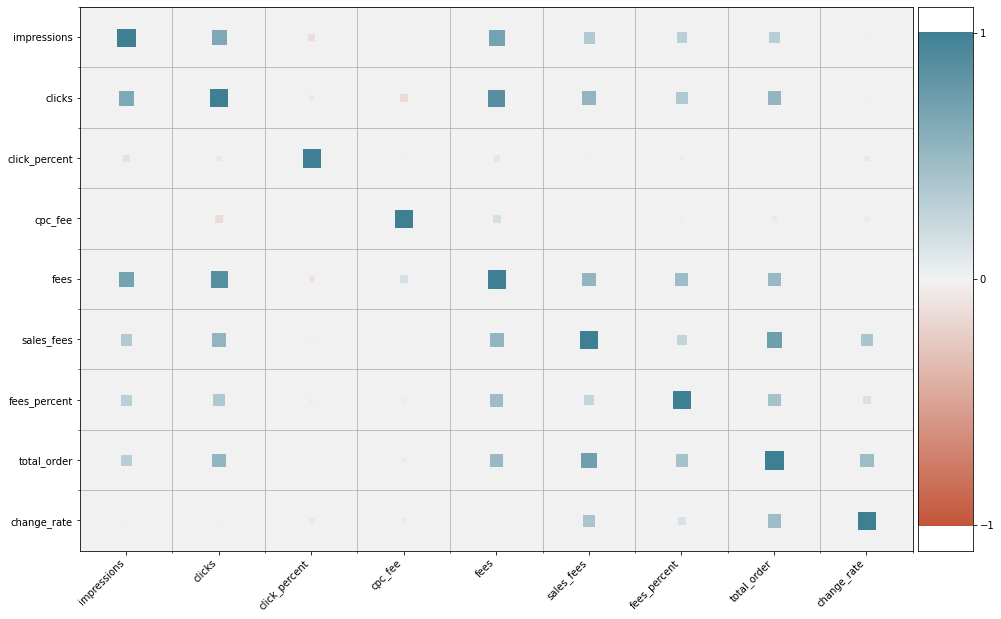

In [18]:
plt.figure(figsize=(16, 10))
corrplot(data2.corr(), size_scale=300)

In [ ]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=["object"]).columns:
    display(pd.crosstab(index=churn[column], columns="% observations", normalize="columns"))
    
    
# Histograms for each numeric features
display(data.describe())
%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(10, 10))

In [19]:
def add_time_hollday(df):
    # time feature, weekday/month/quarter
    df['weekday'] = df['date_time'].map(lambda x: x.dayofweek)
    df['weekend'] = df['date_time'].map(lambda x: judge_weekend(x))
    df['month'] = df['date_time'].map(lambda x: x.month)
    df['quater'] = df['date_time'].map(lambda x: x.quarter)
    df['holiday_type'] = df['date_time'].map(lambda x: judge_holiday(x))
    return df

def judge_weekend(date):
    if date.weekday() > 5:
        return 'weekend'
    else:
        return 'weekday'

def judge_holiday(date):
    # thanks-giving
    if date.month == 11:
        if get_thanksgiving(date.year) == date.day:
            return 'thanksgiving'
        elif get_thanksgiving(date.year) + 1 == date.day:
            return 'blackfirday'
        return 'normal'
    elif date.month == 12 and date.day == 25:
        return 'chirsmas'
    else:
        return 'normal'


def get_thanksgiving(year):
    month = 11
    thursday = 4
    date_value_index = 0
    cal = calendar.Calendar(firstweekday=6)

    weeks = cal.monthdays2calendar(year, month)
    week_index = 3
    if weeks[0][thursday][date_value_index] == 0:
        week_index += 1
    result = weeks[week_index][thursday][date_value_index]
    # print("{}年的感恩节是：11月{}日".format(year, str(result).zfill(2)))
    return result

In [20]:
data3 =add_time_hollday(data2)
data3

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,fees_percent,total_order,change_rate,date_time,create_time,weekday,weekend,month,quater,holiday_type
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.0000,0,0.0,2022-07-02,2022-07-04 11:35:47,5,weekday,7,3,normal
1,443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,...,0.0000,0,0.0,2022-07-02,2022-07-04 11:35:47,5,weekday,7,3,normal
2,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,0.0000,0,0.0,2022-06-30,2022-07-04 11:35:47,3,weekday,6,2,normal
3,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,0.0000,0,0.0,2022-07-03,2022-07-04 11:35:47,6,weekend,7,3,normal
4,443685,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,253,2,...,0.0000,0,0.0,2022-06-30,2022-07-04 11:35:47,3,weekday,6,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,1340944,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,235585786033166,dual band usb wifi adapter,3,52,1,...,0.0000,0,0.0,2022-06-10,2022-07-04 18:19:51,4,weekday,6,2,normal
13770,1340954,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,252298897601949,ac1300 usb wifi adapter,3,5,1,...,0.0000,0,0.0,2022-06-10,2022-07-04 18:19:51,4,weekday,6,2,normal
13771,1340955,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,174832515079630,external usb wifi adapter,1,4,1,...,0.0000,0,0.0,2022-06-10,2022-07-04 18:19:51,4,weekday,6,2,normal
13772,1340958,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,98,2,...,0.1432,1,0.5,2022-06-11,2022-07-04 18:19:52,5,weekday,6,2,normal


In [22]:
data3.columns.tolist()

['id',
 'campaign_name',
 'campaign_id',
 'adv_group_name',
 'adv_group_id',
 'keyword_id',
 'keyword_text',
 'match_type',
 'impressions',
 'clicks',
 'click_percent',
 'cpc_fee',
 'fees',
 'sales_fees',
 'fees_percent',
 'total_order',
 'change_rate',
 'date_time',
 'create_time',
 'weekday',
 'weekend',
 'month',
 'quater',
 'holiday_type']

In [125]:
data_addtime.columns.tolist()

['id',
 'campaign_name',
 'campaign_id',
 'adv_group_name',
 'adv_group_id',
 'keyword_id',
 'keyword_text',
 'match_type',
 'impressions',
 'clicks',
 'click_percent',
 'cpc_fee',
 'fees',
 'sales_fees',
 'fees_percent',
 'total_order',
 'change_rate',
 'date_time',
 'create_time',
 'weekday',
 'weekend',
 'month',
 'quater',
 'holiday_type']

In [23]:
def get_past_features(feature_name, df_res_4):
    groups = df_res_4.groupby(['id','campaign_id', 'keyword_text'])[feature_name]
    # groups.to_csv("./demo.cvs")
    # past n day lag feature, rolling window feature
    for i in [1,3,7]:
        if i>1:
            df_res_4[f'rolling_sum_{i}_{feature_name}'] = groups.rolling(i).sum().reset_index()[feature_name]
        df_res_4[f'Lag_{i}_{feature_name}'] = groups.shift(i)
        df_res_4[f'rolling_mean_{i}_{feature_name}'] = groups.rolling(i).mean().reset_index()[feature_name]
       

def add_time_feature(df_res_4):
    #if set(["rank", "price", "quantity"]) < set(df_res_4.columns.tolist()):
        #coumns = ['costs','sales', 'conversion',"impressions", 'price', 'rank', 'quantity',"discount","review_num"]
    #else:
        #coumns = ['costs', 'sales', 'orders', 'conversion', 'clicks']
    #  add past 1 day, 1 week, 1 year avg quantity, conversion
    coumns = ['clicks',"total_order","impressions"]
    df_res_4 = df_res_4.sort_values(by=['id', 'campaign_id', "keyword_text", 'create_time']).reset_index(
        drop=True)
    for i in coumns:
        get_past_features(i, df_res_4)
    return df_res_4

In [24]:
data4 = add_time_feature(data3)
data4

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,Lag_7_total_order,rolling_mean_7_total_order,Lag_1_impressions,rolling_mean_1_impressions,rolling_sum_3_impressions,Lag_3_impressions,rolling_mean_3_impressions,rolling_sum_7_impressions,Lag_7_impressions,rolling_mean_7_impressions
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,NaN,NaN,NaN,1122.0,NaN,NaN,NaN,NaN,NaN,NaN
1,443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,...,NaN,NaN,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN
2,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,NaN,NaN,NaN,1826.0,NaN,NaN,NaN,NaN,NaN,NaN
3,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,NaN,NaN,NaN,1749.0,NaN,NaN,NaN,NaN,NaN,NaN
4,443685,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,253,2,...,NaN,NaN,NaN,253.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,1340944,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,235585786033166,dual band usb wifi adapter,3,52,1,...,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN
13770,1340954,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,252298897601949,ac1300 usb wifi adapter,3,5,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
13771,1340955,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,174832515079630,external usb wifi adapter,1,4,1,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
13772,1340958,B09SZ8J53Q-EXACT,249709110554332,广告组 - 4/6/2022 02:21:25,133072752338548,166750926565310,bluetooth wifi usb adapter,3,98,2,...,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data4.dtypes

id                                    object
campaign_name                         object
campaign_id                           object
adv_group_name                        object
adv_group_id                          object
keyword_id                            object
keyword_text                          object
match_type                          category
impressions                            int64
clicks                                 int64
click_percent                        float64
cpc_fee                              float64
fees                                 float64
sales_fees                           float64
fees_percent                         float64
total_order                            int64
change_rate                          float64
date_time                     datetime64[ns]
create_time                   datetime64[ns]
weekday                                int64
weekend                               object
month                                  int64
quater    

In [26]:
data4.head(2)

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,Lag_7_total_order,rolling_mean_7_total_order,Lag_1_impressions,rolling_mean_1_impressions,rolling_sum_3_impressions,Lag_3_impressions,rolling_mean_3_impressions,rolling_sum_7_impressions,Lag_7_impressions,rolling_mean_7_impressions
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,NaN,NaN,NaN,1122.0,NaN,NaN,NaN,NaN,NaN,NaN
1,443662,701 广泛2,4530658935928,Ad group 1,277776736707261,60559872622475,12v car fan,3,164,1,...,NaN,NaN,NaN,164.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# bert infer
class BertTextNet(nn.Module):
    def __init__(self, code_length):
        super(BertTextNet, self).__init__()

        modelConfig = BertConfig.from_pretrained('bert-base-uncased')
        self.textExtractor = BertModel.from_pretrained('bert-base-uncased')
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, tokens, segments, input_masks):
        output = self.textExtractor(tokens, token_type_ids=segments,
                                    attention_mask=input_masks)
        text_embeddings = output[0][:, 0, :]
        # output[0](batch size, sequence length, model hidden dimension)

        return text_embeddings


def get_embedding_torch_tensor(tokenizer, textNet, texts):
    tokens, segments, input_masks = [], [], []
    for text in texts:
        texts = "[CLS] " + text + " [SEP]"
        tokenized_text = tokenizer.tokenize(texts)  # 用tokenizer对句子分词
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)  # 索引列表
        tokens.append(indexed_tokens)
        segments.append([0] * len(indexed_tokens))
        input_masks.append([1] * len(indexed_tokens))

    max_len = max([len(single) for single in tokens])  # 最大的句子长度

    for j in range(len(tokens)):
        padding = [0] * (max_len - len(tokens[j]))
        tokens[j] += padding
        segments[j] += padding
        input_masks[j] += padding
    # segments列表全0，因为只有一个句子1，没有句子2
    # input_masks列表1的部分代表句子单词，而后面0的部分代表paddig，只是用于保持输入整齐，没有实际意义。
    # 相当于告诉BertModel不要利用后面0的部分

    # 转换成PyTorch tensors
    tokens_tensor = torch.tensor(tokens)
    segments_tensors = torch.tensor(segments)
    input_masks_tensors = torch.tensor(input_masks)

    # ——————提取文本特征——————
    text_hashCodes = textNet(tokens_tensor, segments_tensors, input_masks_tensors)  # text_hashCodes是一个32-dim文本特征
    # print(text_hashCodes)
    return text_hashCodes


def get_embedding_df(tokenizer, textNet, texts, feature_name):
    text_hashCodes = get_embedding_torch_tensor(tokenizer, textNet, texts)
    x = text_hashCodes.detach().numpy()
    res = pd.DataFrame(x)
    res.columns = [feature_name + '_' + str(i) for i in range(768)]
    res.insert(0, 'key', texts)  # todo 添加到指定位置
    return res

In [28]:
# 针对文本特征(投放关键词, 投放类目名), 利用nlp中的bert模型,获取pretrain embedding(n*32)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
textNet = BertTextNet(code_length=32)

#category_df = get_embedding_df(tokenizer,textNet,texts = data['category_name'].unique(),feature_name = 'values')
keyword_df = get_embedding_df(tokenizer,textNet,texts = data4['keyword_text'].unique(),feature_name = 'values')

In [29]:
keyword_df

,key,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,...,values_758,values_759,values_760,values_761,values_762,values_763,values_764,values_765,values_766,values_767
0,fan for car,-0.195369,0.058578,-0.008068,0.050508,-0.206929,-0.086747,0.141254,0.269107,-0.144570,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
1,12v car fan,-0.300662,-0.051020,0.166539,-0.032802,-0.141515,-0.526385,-0.216005,0.254710,-0.145574,...,0.284963,-0.141702,0.035252,0.129838,0.243467,0.040216,-0.142883,-0.153460,0.129818,0.665139
2,lego boys,-0.185126,-0.142705,-0.063215,0.129299,-0.362086,0.072239,0.359198,0.557396,-0.800073,...,0.185612,0.009808,0.289244,0.105854,0.386684,0.018726,-0.036118,-0.315603,0.131371,0.254539
3,lego speed champion,-0.700023,-0.237702,0.072355,0.170796,-0.165431,0.452239,0.498077,0.202452,-0.478394,...,0.183095,0.107647,0.356615,-0.017270,0.397870,-0.174701,-0.320719,-0.154164,0.320852,0.154110
4,lego dinosaur,-0.654016,0.214210,-0.175250,0.315306,0.045266,0.260409,0.377355,0.751366,-0.818787,...,0.151562,0.166023,0.322523,0.346569,0.550822,-0.162026,0.080975,-0.205260,0.137498,0.196153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,usb wifi adapter wireless,-0.469833,-0.585769,-0.401788,0.062598,-0.071294,-0.188952,0.208285,0.611331,-0.230641,...,0.298657,-0.698051,0.240357,0.305246,-0.051302,0.161937,-0.018759,-0.577886,-0.294360,0.444436
854,hotspot for laptop,-0.586693,-0.085722,-0.200516,0.212374,0.137192,0.130071,0.202257,0.460369,-0.631486,...,0.128284,-0.102530,0.271462,0.321551,0.272866,-0.230494,0.013362,-0.372411,-0.000362,0.624543
855,netgear wifi adapter,-0.437611,-0.346674,-0.072162,-0.011777,-0.103091,-0.361629,-0.126399,0.385483,-0.418240,...,0.427755,-0.332036,0.134311,0.158951,0.230830,0.268609,-0.157384,-0.438838,-0.223034,0.411033
856,linux usb wifi adapter,-0.516046,-0.289388,-0.275696,-0.072711,0.057067,-0.282879,0.187347,0.669401,-0.536893,...,0.329169,-0.520011,0.095224,0.063882,0.252877,0.172489,0.046662,-0.443721,-0.077244,0.435515


In [30]:
data5 = pd.merge(data4,keyword_df,left_on='keyword_text',right_on='key')
data5

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,values_758,values_759,values_760,values_761,values_762,values_763,values_764,values_765,values_766,values_767
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
1,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
2,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
3,443703,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1191,11,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
4,443704,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1781,8,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.076100,-0.257683,-0.114815,0.388750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,1330365,Adtron-WiFi Adapter-SP-KW-M,276016968054984,ADS Group,159252599947868,200542530175892,hotspot for laptop,1,4,1,...,0.128284,-0.102530,0.271462,0.321551,0.272866,-0.230494,0.013362,-0.372411,-0.000362,0.624543
13770,1330383,Adtron-WiFi Adapter-SP-KW-M,276016968054984,ADS Group,159252599947868,247511271079565,netgear wifi adapter,1,5,1,...,0.427755,-0.332036,0.134311,0.158951,0.230830,0.268609,-0.157384,-0.438838,-0.223034,0.411033
13771,1330527,Adtron-WiFi Adapter-SP-KW-M,276016968054984,ADS Group,159252599947868,157392185714102,linux usb wifi adapter,1,123,1,...,0.329169,-0.520011,0.095224,0.063882,0.252877,0.172489,0.046662,-0.443721,-0.077244,0.435515
13772,1339962,600M网卡精准-无曝光关键词测试,87385506202866,600M网卡精准-无曝光关键词测试,278768579925466,105611616812882,wireless usb adapter wifi,1,5,1,...,0.189497,-0.439901,0.164885,0.182307,-0.045206,0.270378,0.047296,-0.474664,-0.394078,0.553866


In [31]:
data5.describe()

,impressions,clicks,click_percent,cpc_fee,fees,sales_fees,fees_percent,total_order,change_rate,weekday,...,values_758,values_759,values_760,values_761,values_762,values_763,values_764,values_765,values_766,values_767
count,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,...,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000,13774.000000
mean,1294.613765,4.985262,0.019235,1.016764,4.291116,11.016626,0.047705,0.355888,0.079637,3.168143,...,0.093448,-0.162813,0.226456,0.145847,0.163183,-0.125696,-0.042624,-0.236067,0.005857,0.249174
std,2684.753848,9.937911,0.064143,0.517731,6.204012,34.799478,0.141680,0.952416,0.253087,2.034491,...,0.233606,0.221633,0.169318,0.157673,0.199336,0.182462,0.176989,0.166237,0.203210,0.187349
min,1.000000,1.000000,0.000100,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.687441,-0.943166,-0.196310,-0.340450,-0.598914,-0.711852,-0.606223,-0.792447,-0.679040,-0.360059
25%,136.000000,1.000000,0.002800,0.600000,1.120000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.081261,-0.268621,0.105074,0.040899,0.047024,-0.257832,-0.147684,-0.355580,-0.122289,0.129564
50%,477.000000,2.000000,0.005800,0.910000,2.080000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.098316,-0.141702,0.229094,0.154018,0.157272,-0.138296,-0.029537,-0.216543,0.015355,0.245063
75%,1357.000000,5.000000,0.013500,1.380000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.230825,-0.020532,0.328020,0.249935,0.275181,-0.007384,0.067548,-0.116650,0.137399,0.367833
max,58740.000000,168.000000,1.000000,4.480000,84.130000,639.920000,2.752900,18.000000,9.000000,6.000000,...,0.955034,0.516955,0.803953,0.750086,0.821099,0.435718,0.503759,0.204780,0.877924,0.876824


In [32]:
data5.head(5)

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,values_758,values_759,values_760,values_761,values_762,values_763,values_764,values_765,values_766,values_767
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875
1,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875
2,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875
3,443703,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1191,11,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875
4,443704,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1781,8,...,0.154365,-0.106002,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875


In [33]:
#print("------------"*10)
data5.dtypes

id                 object
campaign_name      object
campaign_id        object
adv_group_name     object
adv_group_id       object
                   ...   
values_763        float32
values_764        float32
values_765        float32
values_766        float32
values_767        float32
Length: 817, dtype: object

In [34]:
#some question about "total_order" had value but sales with no value

In [35]:
#data["id"] = data["id"].astype("object")

In [36]:
# 离散特征进行one_hot
li_sparse_features = ['id',"campaign_id",'weekday','match_type','month','weekend', 'holiday_type','quater']
for feature in li_sparse_features:
    data_res = pd.get_dummies(data5[feature], prefix=feature)
    print(data5.shape, data_res.shape)
    data6 = pd.concat((data5, data_res), axis=1)
    print(data6.shape)

/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


(13774, 817) (13774, 13774)
(13774, 14591)
(13774, 817) (13774, 395)
(13774, 1212)
(13774, 817) (13774, 7)
(13774, 824)
(13774, 817) (13774, 3)
(13774, 820)
(13774, 817) (13774, 2)
(13774, 819)
(13774, 817) (13774, 2)
(13774, 819)
(13774, 817) (13774, 1)
(13774, 818)
(13774, 817) (13774, 2)
(13774, 819)


/home/ec2-user/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [37]:
len(data6.columns.tolist())

819

In [38]:
data6.head(5)

,id,campaign_name,campaign_id,adv_group_name,adv_group_id,keyword_id,keyword_text,match_type,impressions,clicks,...,values_760,values_761,values_762,values_763,values_764,values_765,values_766,values_767,quater_2,quater_3
0,443658,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1122,11,...,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875,0,1
1,443680,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1826,9,...,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875,1,0
2,443681,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1749,10,...,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875,0,1
3,443703,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1191,11,...,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875,0,1
4,443704,701 广泛2,4530658935928,Ad group 1,277776736707261,166590207224825,fan for car,3,1781,8,...,0.176933,0.256286,0.363035,-0.194585,-0.0761,-0.257683,-0.114815,0.38875,1,0


In [39]:
data_final=data6.copy(deep=True)
features = ['id', 'campaign_name','campaign_id', 'adv_group_name','adv_group_id','keyword_id','keyword_text',
            'match_type','impressions','click_percent','fees',
            'sales_fees','fees_percent', 'change_rate','date_time','create_time','weekday', 
            'weekend','month','quater', 'holiday_type',"key"]
#keep 'cpc_fee','total_order','clicks'
#过滤无效特征
for feature in  features:
    data_final.drop(feature, axis=1, inplace=True)

In [42]:
len(data_final.columns.tolist())

797

In [43]:
len(set(data_final.columns.tolist()))

797

In [44]:
data_final.to_pickle('data_final.pkl')

In [ ]:
from collections import Counter
a= data.columns.tolist()
b = dict(Counter(a))
print({key:value for key,value in b.items() if value>1})

In [3]:

adv_type=1
df =pd.read_pickle("db.pkl")
df


,listing_id,campaign_id,report_date,quantity,date,price,star,review_num,discount,discount_coefficient,...,clicks,costs,orders,sales,category_id,rank,fetch_time,category_name,conversion,ctr
0,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,2,2.20,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.003745
2,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,1,1.08,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.000438
4,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,1,1.82,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.090909
8,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,12,18.32,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.012133
10,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,15,26.15,1,47.99,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.066667,0.003081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487825,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,2,2.89,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.076923
487827,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,3,7.22,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.005190
487829,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,1,4.20,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.001773
487831,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,7,24.82,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.009032


In [4]:
def format_db_dataframe(df):
    df["date"] = pd.to_datetime(df['date'])
    df["report_date"] = pd.to_datetime(df['report_date'])
    df["fetch_time"] = pd.to_datetime(df['fetch_time'])
#     df.drop(columns=['id',"adv_type","account"], inplace=True, axis=1)
    print('data shape by format:', df.shape)
    return df

def fetch_data(sql):
    df = pd.read_sql(sql, conn).drop_duplicates()
    return df

In [5]:

df =format_db_dataframe(df)
df

data shape by format: (233627, 22)


,listing_id,campaign_id,report_date,quantity,date,price,star,review_num,discount,discount_coefficient,...,clicks,costs,orders,sales,category_id,rank,fetch_time,category_name,conversion,ctr
0,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,2,2.20,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.003745
2,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,1,1.08,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.000438
4,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,1,1.82,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.090909
8,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,12,18.32,0,0.00,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.001000,0.012133
10,42,247276414448595,2022-02-26,14,2022-02-26,26.99,4.6,5375,55.00,0.145595,...,15,26.15,1,47.99,17534489011,327,2022-02-26,"Home & Kitchen,Lighting & Ceiling Fans,Novelty...",0.066667,0.003081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487825,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,2,2.89,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.076923
487827,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,3,7.22,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.005190
487829,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,1,4.20,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.001773
487831,9170726,161198082829849,2022-05-24,6,2022-05-24,499.00,0.0,0,344.83,0.133602,...,7,24.82,0,0.00,9886282011,54,2022-05-24,"Herramientas y Mejoras del Hogar,Iluminación,I...",0.001000,0.009032


In [6]:
df.describe()

,quantity,price,star,review_num,discount,discount_coefficient,impressions,clicks,costs,orders,sales,rank,conversion,ctr
count,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000,233627.000000
mean,52.909484,89.308799,4.491519,6924.673732,187.629593,0.069781,1227.186117,6.207014,7.068736,0.765215,37.929357,92.603736,0.072828,0.066354
std,85.029993,447.462129,0.315743,14641.839550,576.179402,0.066498,3825.892729,15.919011,24.988695,2.476701,235.309119,529.574724,0.146323,0.157910
min,1.000000,8.490000,0.000000,0.000000,0.060000,0.000153,1.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.001000,0.000037
25%,12.000000,21.240000,4.400000,456.000000,12.110000,0.019206,38.000000,1.000000,0.750000,0.000000,0.000000,5.000000,0.001000,0.004219
50%,28.000000,33.990000,4.500000,1666.000000,48.340000,0.053491,198.000000,2.000000,1.660000,0.000000,0.000000,23.000000,0.001000,0.012513
75%,59.000000,69.990000,4.600000,6117.000000,181.670000,0.097304,920.000000,5.000000,4.750000,1.000000,15.570000,70.000000,0.071429,0.048387
max,986.000000,10980.000000,5.000000,121166.000000,72600.000000,0.694116,181551.000000,661.000000,1476.330000,74.000000,46189.000000,17222.000000,0.928571,1.000000


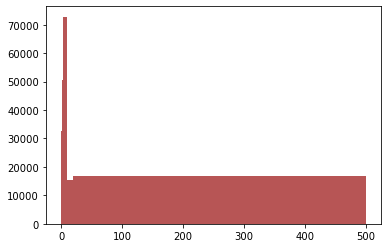

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4)) #新建画布
plt.hist(df['costs'],bins = [0, 0.5,1,2, 10, 20, 500],color='brown', alpha = 0.8, label = "直方图" ) #绘制直方图

plt.show()

In [15]:
df[df['costs']>=0.5].shape[0]/df.shape[0]

0.8610991024153887

In [6]:
df =df[df['costs']>=0.5]
df.corr()

,quantity,price,star,review_num,discount,discount_coefficient,impressions,clicks,costs,orders,sales,rank,conversion,ctr
quantity,1.000000,-0.068895,0.062462,0.709630,0.285869,-0.008040,0.110176,0.226035,0.156955,0.263900,0.058545,-0.076674,0.113652,-0.020594
price,-0.068895,1.000000,-0.273608,-0.067199,0.364350,0.080356,-0.024208,-0.021436,0.205534,-0.030953,0.214991,-0.006056,-0.037469,0.031911
star,0.062462,-0.273608,1.000000,0.048182,-0.090184,-0.095625,0.038826,0.028831,0.001333,0.028411,-0.047207,-0.056176,0.018659,-0.038732
review_num,0.709630,-0.067199,0.048182,1.000000,0.076887,-0.085994,0.103115,0.191890,0.131847,0.228487,0.029692,-0.063101,0.088108,-0.012677
discount,0.285869,0.364350,-0.090184,0.076887,1.000000,0.325989,0.046190,0.095738,0.152210,0.081952,0.254587,-0.031158,0.006173,0.002524
discount_coefficient,-0.008040,0.080356,-0.095625,-0.085994,0.325989,1.000000,0.047438,0.013028,0.060324,0.018940,0.042979,0.067003,-0.007613,-0.016114
impressions,0.110176,-0.024208,0.038826,0.103115,0.046190,0.047438,1.000000,0.743237,0.682963,0.597877,0.265065,-0.014145,0.074517,-0.122313
clicks,0.226035,-0.021436,0.028831,0.191890,0.095738,0.013028,0.743237,1.000000,0.819459,0.856955,0.372658,-0.028513,0.121021,-0.082101
costs,0.156955,0.205534,0.001333,0.131847,0.152210,0.060324,0.682963,0.819459,1.000000,0.696523,0.385029,-0.020092,0.085432,-0.068092
orders,0.263900,-0.030953,0.028411,0.228487,0.081952,0.018940,0.597877,0.856955,0.696523,1.000000,0.411595,-0.030225,0.378390,-0.067746


# 特征处理

In [7]:
# bert infer
class BertTextNet(nn.Module):
    def __init__(self, code_length):
        super(BertTextNet, self).__init__()

        modelConfig = BertConfig.from_pretrained('bert-base-uncased')
        self.textExtractor = BertModel.from_pretrained('bert-base-uncased')
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, tokens, segments, input_masks):
        output = self.textExtractor(tokens, token_type_ids=segments,
                                    attention_mask=input_masks)
        text_embeddings = output[0][:, 0, :]
        # output[0](batch size, sequence length, model hidden dimension)

        return text_embeddings


def get_embedding_torch_tensor(tokenizer, textNet, texts):
    tokens, segments, input_masks = [], [], []
    for text in texts:
        texts = "[CLS] " + text + " [SEP]"
        tokenized_text = tokenizer.tokenize(texts)  # 用tokenizer对句子分词
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)  # 索引列表
        tokens.append(indexed_tokens)
        segments.append([0] * len(indexed_tokens))
        input_masks.append([1] * len(indexed_tokens))

    max_len = max([len(single) for single in tokens])  # 最大的句子长度

    for j in range(len(tokens)):
        padding = [0] * (max_len - len(tokens[j]))
        tokens[j] += padding
        segments[j] += padding
        input_masks[j] += padding
    # segments列表全0，因为只有一个句子1，没有句子2
    # input_masks列表1的部分代表句子单词，而后面0的部分代表paddig，只是用于保持输入整齐，没有实际意义。
    # 相当于告诉BertModel不要利用后面0的部分

    # 转换成PyTorch tensors
    tokens_tensor = torch.tensor(tokens)
    segments_tensors = torch.tensor(segments)
    input_masks_tensors = torch.tensor(input_masks)

    # ——————提取文本特征——————
    text_hashCodes = textNet(tokens_tensor, segments_tensors, input_masks_tensors)  # text_hashCodes是一个32-dim文本特征
    # print(text_hashCodes)
    return text_hashCodes


def get_embedding_df(tokenizer, textNet, texts, feature_name):
    text_hashCodes = get_embedding_torch_tensor(tokenizer, textNet, texts)
    x = text_hashCodes.detach().numpy()
    res = pd.DataFrame(x)
    res.columns = [feature_name + '_' + str(i) for i in range(768)]
    res.insert(0, 'key', texts)  # todo 添加到指定位置
    return res


In [8]:
# time feature #针对时间信息(date),获取周/月/星期/是否为重要节假日(黑五/圣诞/感恩节/etc)
def judge_holiday(date):
    # thanks-giving
    if date.month == 11:
        if get_thanksgiving(date.year) == date.day:
            return 'thanksgiving'
        elif get_thanksgiving(date.year) + 1 == date.day:
            return 'blackfirday'
        return 'normal'
    elif date.month == 12 and date.day == 25:
        return 'chirsmas'
    else:
        return 'normal'


def get_thanksgiving(year):
    month = 11
    thursday = 4
    date_value_index = 0
    cal = calendar.Calendar(firstweekday=6)

    weeks = cal.monthdays2calendar(year, month)
    week_index = 3
    if weeks[0][thursday][date_value_index] == 0:
        week_index += 1
    result = weeks[week_index][thursday][date_value_index]
    # print("{}年的感恩节是：11月{}日".format(year, str(result).zfill(2)))
    return result


def get_past_features(feature_name, df_res_4):
    groups = df_res_4.groupby(['listing_id','campaign_id', 'keyword_text'])[feature_name]
    # groups.to_csv("./demo.cvs")
    # past n day lag feature, rolling window feature
    for i in [1,3,7]:
        if i>1:
            df_res_4[f'rolling_sum_{i}_{feature_name}'] = groups.rolling(i).sum().reset_index()[feature_name]
        df_res_4[f'Lag_{i}_{feature_name}'] = groups.shift(i)
        df_res_4[f'rolling_mean_{i}_{feature_name}'] = groups.rolling(i).mean().reset_index()[feature_name]
       


def add_time_feature(df_res_4):
    if set(["rank", "price", "quantity"]) < set(df_res_4.columns.tolist()):
        coumns = ['costs','sales', 'conversion',"impressions", 'price', 'rank', 'quantity',"discount","review_num"]
    else:
        coumns = ['costs', 'sales', 'orders', 'conversion', 'clicks']
    #  add past 1 day, 1 week, 1 year avg quantity, conversion
    df_res_4 = df_res_4.sort_values(by=['listing_id', 'campaign_id', "keyword_text", 'report_date']).reset_index(
        drop=True)
    for i in coumns:
        get_past_features(i, df_res_4)
    return df_res_4
    
    


def add_time_hollday(df_res_4):
    # time feature, weekday/month/quarter
    df_res_4['weekday'] = df_res_4['date'].map(lambda x: x.dayofweek)
    df_res_4['month'] = df_res_4['date'].map(lambda x: x.month)
    df_res_4['quater'] = df_res_4['date'].map(lambda x: x.quarter)
    df_res_4['holiday_type'] = df_res_4['date'].map(lambda x: judge_holiday(x))
    return df_res_4

In [9]:

data = add_time_feature(df)
data =add_time_hollday(data)
data

转化率...


,listing_id,campaign_id,report_date,quantity,date,price,star,review_num,discount,discount_coefficient,...,rolling_sum_3_review_num,Lag_3_review_num,rolling_mean_3_review_num,rolling_sum_7_review_num,Lag_7_review_num,rolling_mean_7_review_num,weekday,month,quater,holiday_type
0,1253,196974992365564,2022-02-27,48,2022-02-27,19.99,4.5,18492,86.93,0.087342,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,1,normal
1,1253,196974992365564,2022-03-03,40,2022-03-03,19.99,4.5,18492,82.88,0.101470,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,normal
2,1253,196974992365564,2022-03-04,42,2022-03-04,19.99,4.5,18492,89.52,0.100889,...,55476.0,NaN,18492.0,NaN,NaN,NaN,4,3,1,normal
3,1253,196974992365564,2022-03-12,41,2022-03-12,19.99,4.5,18492,92.92,0.111438,...,55476.0,18492.0,18492.0,NaN,NaN,NaN,5,3,1,normal
4,1253,196974992365564,2022-03-15,20,2022-03-15,19.99,4.5,18492,47.92,0.116625,...,55476.0,18492.0,18492.0,NaN,NaN,NaN,1,3,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233622,974848,226657453178622,2022-02-27,1,2022-02-27,17.99,4.5,1513,3.74,0.172112,...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,1,normal
233623,974848,226657453178622,2022-03-11,6,2022-03-11,17.99,4.5,1513,2.49,0.024751,...,NaN,NaN,NaN,NaN,NaN,NaN,4,3,1,normal
233624,974848,226657453178622,2022-04-08,2,2022-04-08,17.99,4.5,1513,3.37,0.089036,...,4539.0,NaN,1513.0,NaN,NaN,NaN,4,4,2,normal
233625,974848,226657453178622,2022-04-14,4,2022-04-14,17.99,4.5,1513,12.00,0.166759,...,4539.0,1513.0,1513.0,NaN,NaN,NaN,3,4,2,normal


In [10]:
# 针对文本特征(投放关键词, 投放类目名), 利用nlp中的bert模型,获取pretrain embedding(n*32)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
textNet = BertTextNet(code_length=32)

category_df = get_embedding_df(tokenizer,textNet,texts = data['category_name'].unique(),feature_name = 'values')
keyword_df = get_embedding_df(tokenizer,textNet,texts = data['keyword_text'].unique(),feature_name = 'values')


In [11]:
# ## feature 163
# data = df[df["conversion"]<1]
# data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
# #增加时序特征
# data = add_time_feature(data,0)

#merge keyword/category info as text embedding
data = pd.merge(data,category_df,left_on='category_name',right_on='key')
data = pd.merge(data,keyword_df,left_on='keyword_text',right_on='key')
data

,listing_id,campaign_id,report_date,quantity,date,price,star,review_num,discount,discount_coefficient,...,values_758_y,values_759_y,values_760_y,values_761_y,values_762_y,values_763_y,values_764_y,values_765_y,values_766_y,values_767_y
0,1253,196974992365564,2022-02-27,48,2022-02-27,19.99,4.5,18492,86.93,0.087342,...,0.340101,-0.193414,0.342875,0.178541,0.158880,-0.251617,0.106752,-0.136586,0.248253,0.325315
1,1253,196974992365564,2022-03-03,40,2022-03-03,19.99,4.5,18492,82.88,0.101470,...,0.340101,-0.193414,0.342875,0.178541,0.158880,-0.251617,0.106752,-0.136586,0.248253,0.325315
2,1253,196974992365564,2022-03-04,42,2022-03-04,19.99,4.5,18492,89.52,0.100889,...,0.340101,-0.193414,0.342875,0.178541,0.158880,-0.251617,0.106752,-0.136586,0.248253,0.325315
3,1253,196974992365564,2022-03-12,41,2022-03-12,19.99,4.5,18492,92.92,0.111438,...,0.340101,-0.193414,0.342875,0.178541,0.158880,-0.251617,0.106752,-0.136586,0.248253,0.325315
4,1253,196974992365564,2022-03-15,20,2022-03-15,19.99,4.5,18492,47.92,0.116625,...,0.340101,-0.193414,0.342875,0.178541,0.158880,-0.251617,0.106752,-0.136586,0.248253,0.325315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233622,885746,195054377526473,2022-05-16,5,2022-05-16,17.99,4.6,4464,2.74,0.034600,...,0.257728,-0.336012,0.344589,-0.019781,-0.146626,0.075864,-0.394889,-0.674821,0.105621,0.382084
233623,885746,195054377526473,2022-05-17,6,2022-05-17,17.99,4.6,4464,0.21,0.002183,...,0.257728,-0.336012,0.344589,-0.019781,-0.146626,0.075864,-0.394889,-0.674821,0.105621,0.382084
233624,885746,195054377526473,2022-05-18,10,2022-05-18,17.99,4.6,4464,2.93,0.017377,...,0.257728,-0.336012,0.344589,-0.019781,-0.146626,0.075864,-0.394889,-0.674821,0.105621,0.382084
233625,885746,195054377526473,2022-05-20,5,2022-05-20,17.99,4.6,4464,3.27,0.041019,...,0.257728,-0.336012,0.344589,-0.019781,-0.146626,0.075864,-0.394889,-0.674821,0.105621,0.382084


In [14]:
# # 特征进行one_hot
# li_sparse_features = ['listing_id','weekday','month','holiday_type','quater']
# # 特征进行one_hot
# for feature in li_sparse_features:
#     data1 = pd.get_dummies(data[feature], prefix=feature)
#     print(data.shape, data1.shape)
#     data = pd.concat((data, data1), axis=1)
#     print(data.shape)
    

# #过滤无效特征
# for feature in ['listing_id', 'campaign_id', 'report_date', 'impressions', 'clicks',
#        'sales', 'orders', 'ctr', 'date',
#        'keyword_text', 'category_id', 'fetch_time', 
#         'category_name','weekday','month','holiday_type','quater','quantity','rank','key_x','key_y']:
#     data.drop(feature, axis=1, inplace=True)

# print(data.shape)

In [13]:
# 特征进行one_hot
li_sparse_features = ['listing_id','weekday','month','holiday_type','quater',"campaign_id"]
for feature in li_sparse_features:
    data1 = pd.get_dummies(data[feature], prefix=feature)
    print(data.shape, data1.shape)
    data = pd.concat((data, data1), axis=1)
    print(data.shape)


(233627, 1636) (233627, 464)
(233627, 2100)
(233627, 2100) (233627, 7)
(233627, 2107)
(233627, 2107) (233627, 4)
(233627, 2111)
(233627, 2111) (233627, 1)
(233627, 2112)
(233627, 2112) (233627, 2)
(233627, 2114)
(233627, 2114) (233627, 768)
(233627, 2882)


In [14]:
df_res2=data.copy(deep=True)

In [15]:
features = ['listing_id', 'campaign_id', 'report_date', 'impressions', 'clicks',"ctr",
                'sales', 'orders', 'date', 'keyword_text', 'category_id', 'fetch_time', 'category_name',"discount","discount_coefficient",
                'weekday', 'month', 'holiday_type', 'quater', 'quantity', 'rank', 'key_x', 'key_y',"review_num","star"]


#过滤无效特征
for feature in  features:
    df_res2.drop(feature, axis=1, inplace=True)
    


In [16]:
len(df_res2.columns.tolist())

2857

In [17]:
df_res2.to_pickle('data.pkl')